# Building  fire dectetor model 

In [1]:
from fastbook import *
from fastai.vision.widgets import *

/home/x00whitejsx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
urls = search_images_ddg('wood burning', max_images=1)
ims = urls.attrgot('contentUrl')
len(ims)

1

In [3]:
ims = ['https://jooinn.com/images/burning-wood-1.jpg']

In [4]:
dest = "data/burning-wood.jpg"
download_url(ims[0], dest)

Path('data/burning-wood.jpg')

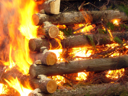

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types = "plastic burning", "wood burning", "rubber burning", "lpg gas gas cylinder burning"

In [8]:
parant_path = Path('datam2')
if not parant_path.exists():
    parant_path.mkdir()
    for o in bear_types:
        dest = parant_path/o
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} fire')
        download_images(dest, urls=results[:1])
        resize_images(dest, max_size=400, dest=dest)

In [9]:
fns = get_image_files(parant_path)
fns

(#498) [Path('datam2/wood burning/72271d77-e953-4629-85bf-5e1bf5f9b3e7.jpg'),Path('datam2/wood burning/086a40e8-fdf4-46b8-80f3-c18497663237.jpg'),Path('datam2/wood burning/0662c36d-3839-473b-b19c-49962dbd1e18.jpg'),Path('datam2/wood burning/2937dcc3-44a4-4d75-9ebd-6376479109a8.jpg'),Path('datam2/wood burning/0a441a8e-1583-49d4-97f4-4a9a529e256d.jpg'),Path('datam2/wood burning/96bb2d6e-7da4-4e8c-99d2-8cb226ad7adc.jpg'),Path('datam2/wood burning/bde2f6ca-7aeb-4644-a5ec-f46ddf68f3be.jpg'),Path('datam2/wood burning/3c31c380-daa2-4cbc-a1b4-f6c0bce43218.jpg'),Path('datam2/wood burning/0e77384c-047a-441f-949f-e3406d77c366.jpg'),Path('datam2/wood burning/7a45d5e9-91ca-471a-a174-64b3bbda33a8.jpg')...]

In [10]:
failed = verify_images(get_image_files(parant_path))
failed

(#0) []

In [11]:
failed.map(Path.unlink)

(#0) []

In [15]:
fire_segment = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(100, method='squish')]
)

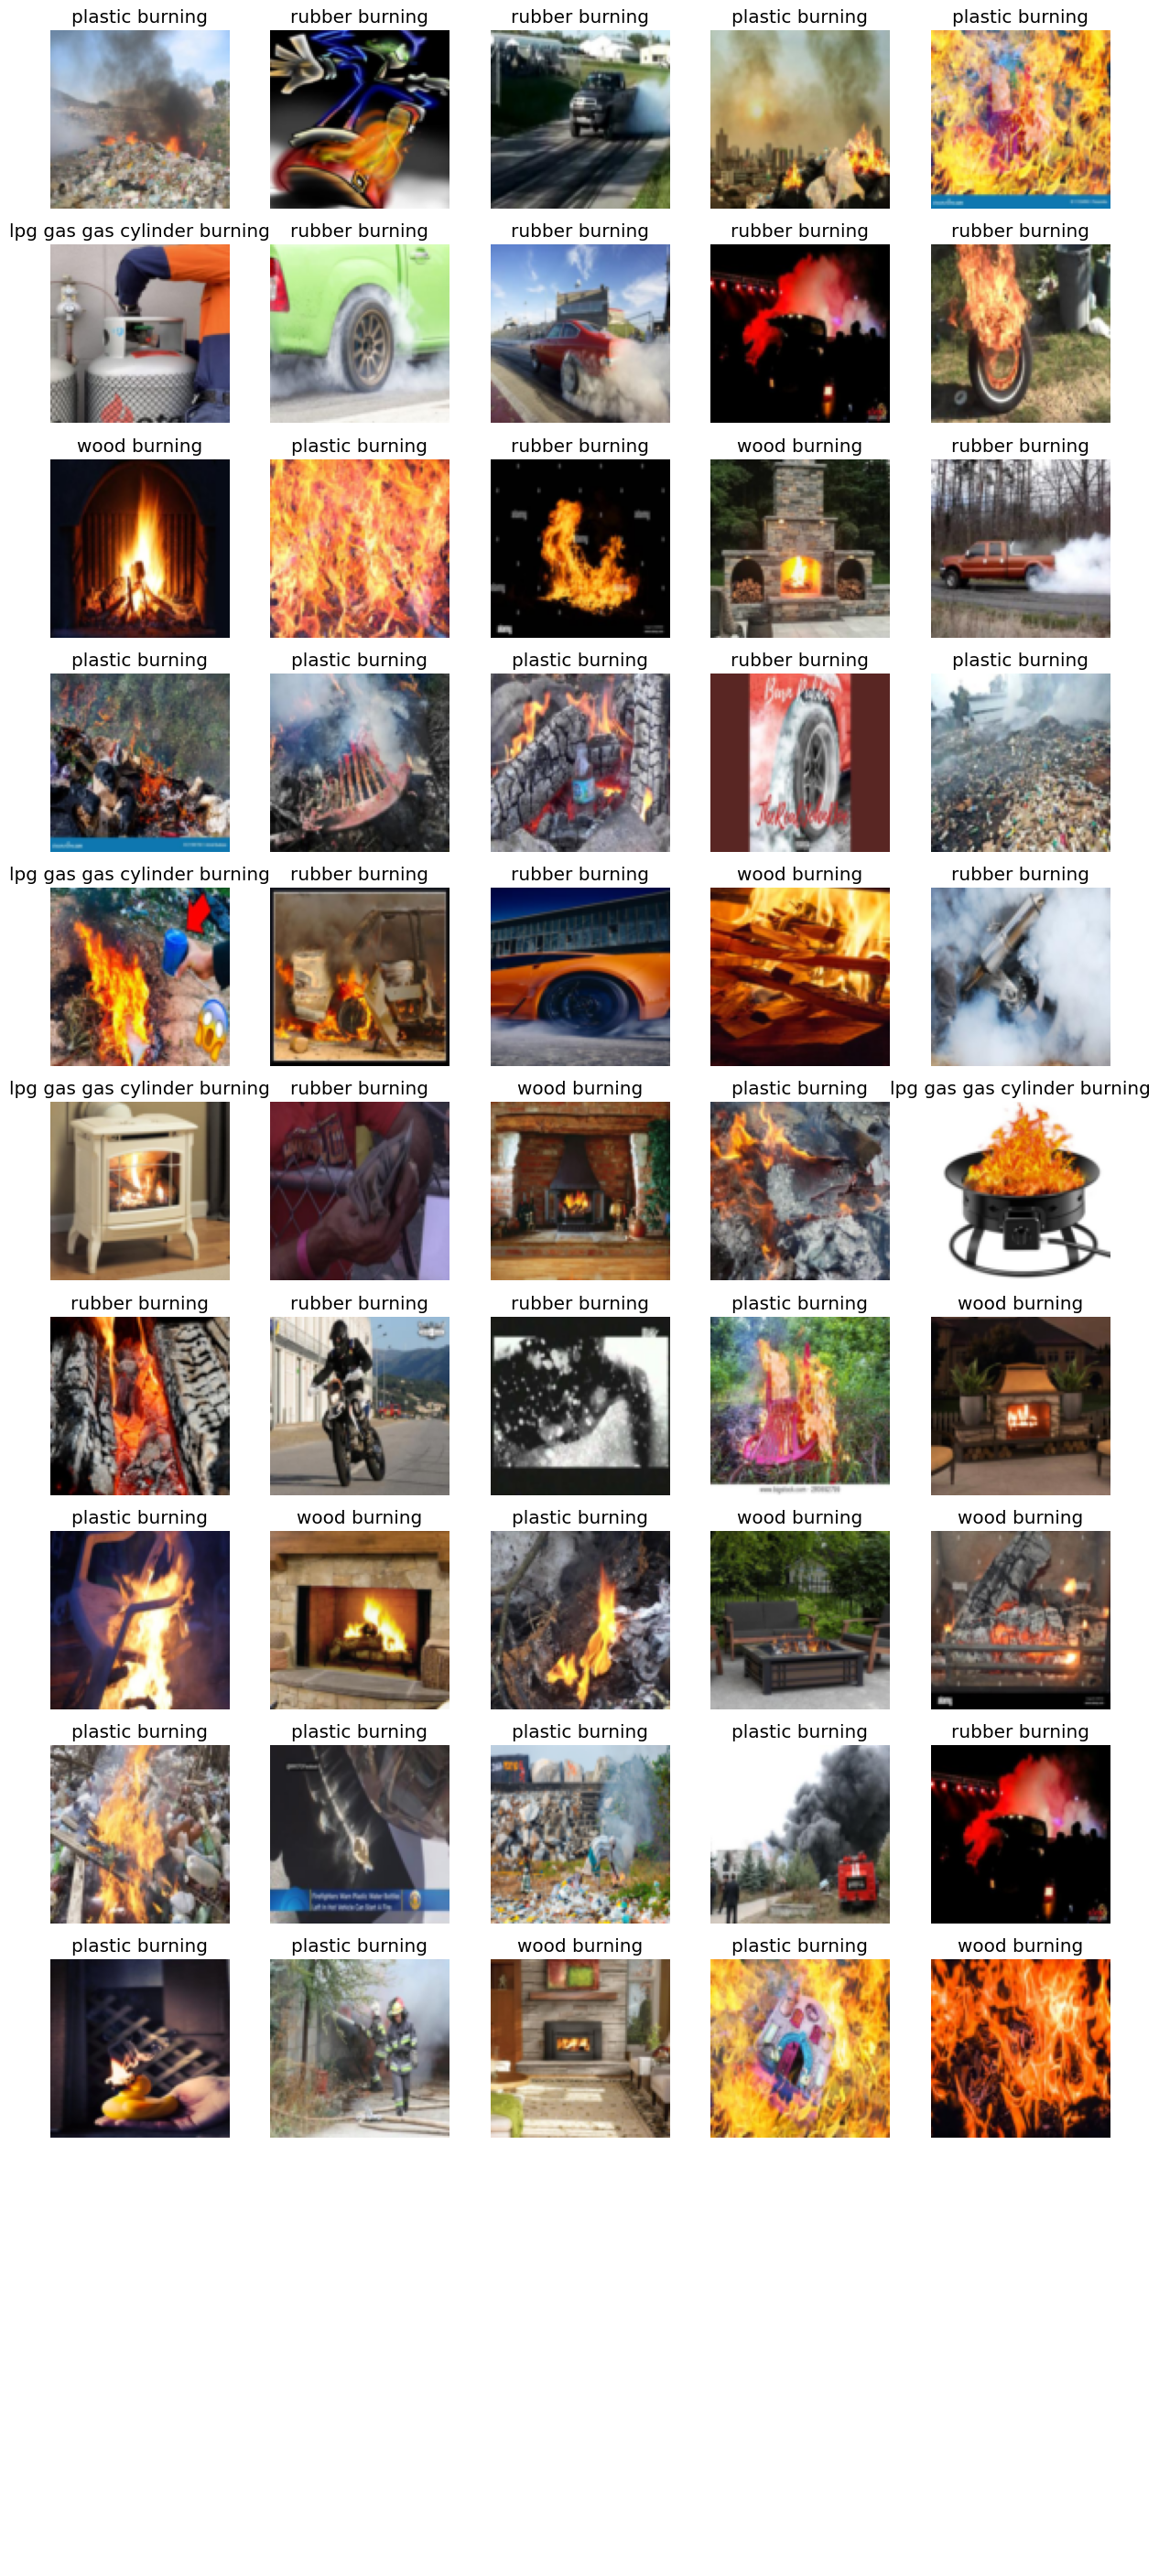

In [16]:
dls = fire_segment.dataloaders(parant_path)
dls.show_batch(max_n=50, nrows=12)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(12)

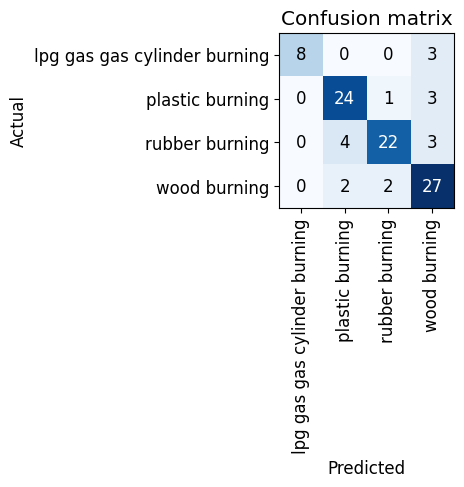

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

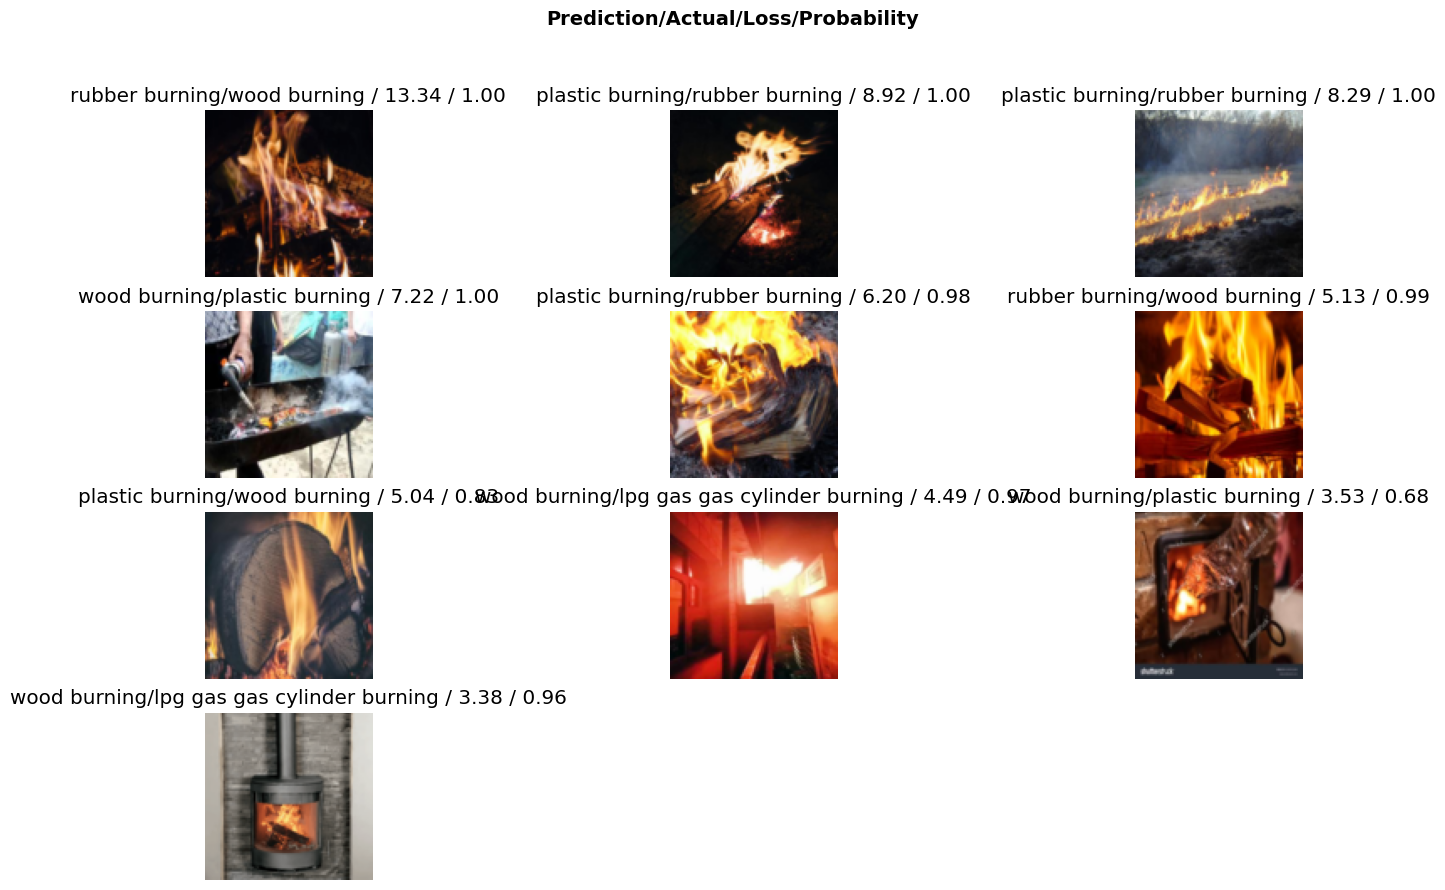

In [19]:
interp.plot_top_losses(10, nrows=4, figsize=(17,10))

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
learn.export("model.pkl")